In [2]:
# Ensure necessary library is installed
install.packages("rvest")
install.packages("tidyverse")
install.packages("lubridate")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [3]:
# Loading Libraries
library(rvest)
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [8]:
#Scrape Data from the Web Page
url <- "https://rateyourmusic.com/charts/top/album/all-time/"
webpage <- read_html(url)

In [13]:
# Extract CSS Selectors
album_names <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_title") %>% 
  html_text() %>%
  str_trim() # Remove any leading or trailing white spaces
artists <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_credited_links_primary") %>% 
  html_text() %>%
  str_trim() # Remove any leading or trailing white spaces
ratings <- webpage %>%
  html_nodes(".page_charts_section_charts_item_details_average_num") %>%
  html_text(trim = TRUE) %>%
  as.numeric() # convert to numeric
ratings <- ratings[seq(1, length(ratings), 2)]
release_date <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_date span:first-child") %>% 
  html_text() %>%
  str_trim() %>% # Remove any leading or trailing white spaces
  parse_date_time(orders = c("dmY", "my")) %>%  # parse using multiple formats
  format("%d-%m-%Y")  # format as dd-mm-yyyy
genres <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_genres_primary") %>% 
  map_chr(~.x %>% # This function from the purrr package is used to apply the nested function to each node, and ensures that the results are returned as character vectors.
            html_nodes("a") %>% 
            html_text() %>% 
            paste(collapse = ", ") #This results in a single string for each album that lists all associated genres in one go.
  )
num_ratings <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_details_ratings .full") %>% 
  html_text() %>%
  str_trim() %>% # Remove any leading or trailing white spaces
  str_remove_all(",") %>%  # remove commas from numbers
  as.numeric() # convert to numeric
num_views <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_details_reviews .full") %>% 
  html_text() %>%
  str_trim() %>%
  str_replace_all(",", "") %>%  # Removing commas
  as.numeric() # convert to numeric
descriptors <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_genre_descriptors") %>% 
  html_text(trim = TRUE) %>%
  str_replace_all("\n", ", ") %>%
  str_squish()


In [17]:
# Transform into a data frame
df <- data.frame(
  Album = album_names,
  Artist = artists,
  Rating = ratings,
  ReleaseDate = release_date,
  Genres = genres,
  Descriptors = descriptors,
  NumberOfRatings = num_ratings,
  NumberOfViews = num_views
)
# Adding a ranking column
df <- df %>% mutate(Ranking = row_number())
# To ensure the Ranking column is first
df <- df %>% select(Ranking, everything())
head(df)


,Ranking,Album,Artist,Rating,ReleaseDate,Genres,Descriptors,NumberOfRatings,NumberOfViews
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,To Pimp a Butterfly,Kendrick Lamar,4.36,15-03-2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, concept album, poetic, introspective, urban, protest, eclectic",69640,597
2,2,OK Computer,Radiohead,4.27,16-06-1997,"Alternative Rock, Art Rock","melancholic, anxious, alienation, futuristic, existential, lonely, atmospheric, cold",94735,1713
3,3,Wish You Were Here,Pink Floyd,4.32,12-09-1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, concept album, serious, longing, introspective, alienation",65282,997
4,4,Madvillainy,Madvillain,4.33,23-03-2004,Abstract Hip Hop,"sampling, playful, abstract, humorous, cryptic, mysterious, eclectic, surreal",54310,469
5,5,In the Court of the Crimson King,King Crimson,4.31,10-10-1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, complex, poetic, surreal, philosophical, melancholic",59998,939
6,6,In Rainbows,Radiohead,4.29,10-10-2007,"Art Rock, Alternative Rock","lush, melancholic, introspective, bittersweet, atmospheric, mellow, warm, ethereal",68581,872


In [18]:
get_album_rating <- function(album_name) {
  # Find the rating of the album
  rating <- df$Rating[df$Album == album_name]
  
  # Check if rating is found or not
  if(length(rating) == 0) {
    return(paste("No rating found for", album_name))
  } else {
    return(paste("The rating for", album_name, "is", rating))
  }
}

# Example usage
get_album_rating("In Rainbows")

[1] "The rating for In Rainbows is 4.29"

In [ ]:
Now, i am going to scrape all data(125 pages) from RYM webpage

In [17]:
# Ensure necessary library is installed
install.packages("rvest")
install.packages("dplyr")
install.packages("purrr")

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message in install.packages("purrr"):
“installation of package ‘purrr’ had non-zero exit status”


In [19]:
# Load the necessary libraries
library(purrr)
library(dplyr)
library(rvest)

In [21]:
# Function to scrape a single page and return a data frame of movies
extract_page_data <- function(page_number) {
  url <- paste0("https://rateyourmusic.com/charts/top/album/all-time/", page_number)
  # Fetch the webpage content for the current page
  webpage <- read_html(url)
  # Extract CSS Selectors
  album_names <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_title") %>% 
    html_text() %>%
    str_trim() # Remove any leading or trailing white spaces
  artists <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_credited_links_primary") %>% 
    html_text() %>%
    str_trim() # Remove any leading or trailing white spaces
  ratings <- webpage %>%
    html_nodes(".page_charts_section_charts_item_details_average_num") %>%
    html_text(trim = TRUE) %>%
    as.numeric() # convert to numeric
  ratings <- ratings[seq(1, length(ratings), 2)]
  release_date <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_date span:first-child") %>% 
    html_text() %>%
    str_trim() # Remove any leading or trailing white spaces
  genres <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_genres_primary") %>% 
    map_chr(~.x %>% 
              html_nodes("a") %>% 
              html_text() %>% 
              paste(collapse = ", ")
    )
  num_ratings <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_details_ratings .full") %>% 
    html_text() %>%
    str_trim() %>%
    str_remove_all(",") %>%
    as.numeric() # convert to numeric
  num_views <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_details_reviews .full") %>% 
    html_text() %>%
    str_trim() %>%
    str_replace_all(",", "") %>%
    as.numeric() # convert to numeric
  descriptors <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_genre_descriptors") %>% 
    html_text(trim = TRUE) %>%
    str_replace_all("\n", ", ") %>%
    str_squish()
  # Check and fix length issues
  if(length(genres) != length(album_names)) {
    # Find positions where values may be missing
    missing_indices <- setdiff(1:length(album_names), 1:length(genres))
    # Insert NA for missing values
    genres <- map2_chr(1:length(album_names), missing_indices, 
                       ~ if (.x %in% .y) NA_character_ else genres[.x])
  }
  
  if(length(descriptors) != length(album_names)) {
    missing_indices <- setdiff(1:length(album_names), 1:length(descriptors))
    descriptors <- map2_chr(1:length(album_names), missing_indices, 
                            ~ if (.x %in% .y) NA_character_ else descriptors[.x])
  }
  # Transform into a data frame
  df <- data.frame(
    Album = album_names,
    Artist = artists,
    Rating = ratings,
    ReleaseDate = release_date,
    Genres = genres,
    Descriptors = descriptors,
    NumberOfRatings = num_ratings,
    NumberOfViews = num_views
  )
  return(df)
}

In [22]:
# Start iterating from page 1
num_pages <- 125
all_data <- purrr::map_df(1:num_pages, ~{
  print(paste("Fetching page", .x))
  Sys.sleep(sample(40:45, 1))  
  extract_page_data(.x)
})

[1] "Fetching page 1"
[1] "Fetching page 2"
[1] "Fetching page 3"
[1] "Fetching page 4"
[1] "Fetching page 5"
[1] "Fetching page 6"
[1] "Fetching page 7"
[1] "Fetching page 8"
[1] "Fetching page 9"
[1] "Fetching page 10"
[1] "Fetching page 11"
[1] "Fetching page 12"
[1] "Fetching page 13"
[1] "Fetching page 14"
[1] "Fetching page 15"
[1] "Fetching page 16"
[1] "Fetching page 17"
[1] "Fetching page 18"
[1] "Fetching page 19"
[1] "Fetching page 20"
[1] "Fetching page 21"
[1] "Fetching page 22"
[1] "Fetching page 23"
[1] "Fetching page 24"
[1] "Fetching page 25"
[1] "Fetching page 26"
[1] "Fetching page 27"
[1] "Fetching page 28"
[1] "Fetching page 29"
[1] "Fetching page 30"
[1] "Fetching page 31"
[1] "Fetching page 32"
[1] "Fetching page 33"
[1] "Fetching page 34"
[1] "Fetching page 35"
[1] "Fetching page 36"
[1] "Fetching page 37"
[1] "Fetching page 38"
[1] "Fetching page 39"
[1] "Fetching page 40"
[1] "Fetching page 41"
[1] "Fetching page 42"
[1] "Fetching page 43"
[1] "Fetching page 4

In [23]:
# Check the data
tail(all_data)

,Album,Artist,Rating,ReleaseDate,Genres,Descriptors,NumberOfRatings,NumberOfViews
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
4995,...And the Battle Begun,Rx Bandits,3.67,14 June 2006,Progressive Rock,"progressive, energetic, warm, melodic, passionate, atmospheric, avant-garde, complex",702,8
4996,The Sullen Sulcus,Mourning Beloveth,3.68,15 December 2002,Death Doom Metal,"melancholic, sombre, depressive, melodic, funereal, heavy, repetitive, death",597,6
4997,Cornonstípicum,M.I.A. (Músicos Independientes Asociados),3.69,1978,"Symphonic Prog, Progressive Rock","melodic, progressive, technical, playful, composition, vocal group, eclectic, energetic",376,13
4998,Браво,Браво,3.69,1987,"Rockabilly, Pop Rock","playful, urban, melodic, eclectic, rhythmic, optimistic",369,2
4999,Let 'Em Roll,Big John Patton,3.70,April 1967,Soul Jazz,"playful, sensual, mellow, rhythmic, instrumental",303,7
5000,Sonny Rollins on Impulse!,Sonny Rollins,3.70,August 1965,Hard Bop,instrumental,313,3


In [24]:
Introduction
I am going to find out:
1.Which year was the most productive in terms of album production and which decades had the most ranked albums. 
2.What does the rating distribution look like?
3.Which main genre was the most popular?
4.Which descriptor is the most common descriptor?
5.What is the relations between Ranking and number of reviews, and Ranking and Average Rating.

ERROR: Error in parse(text = x, srcfile = src): <text>:2:3: unexpected symbol
1: Introduction
2: I am
     ^


In [25]:
# Ensure necessary library is installed
install.packages("lubridate")

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message in install.packages("lubridate"):
“installation of package ‘lubridate’ had non-zero exit status”


In [26]:
# Load the library
library(lubridate)
library(ggplot2)
library(dplyr)

In [27]:
# identify the format of possible date
date_formats <- c("d m Y", "m Y", "Y")

# Using parse_date_time function to convert the release date
all_data$ReleaseDate <- parse_date_time(all_data$ReleaseDate, orders = date_formats)

# Convert to formal dd-mm-yyyy
all_data$releasedate_formatted <- format(all_data$ReleaseDate, "%d-%m-%Y")

# Extract year from ReleaseDate
all_data$year <- year(ymd(all_data$ReleaseDate))

# Summarize album sales per year
yearly_counts <- all_data %>% 
  group_by(year) %>%
  summarise(count = n())


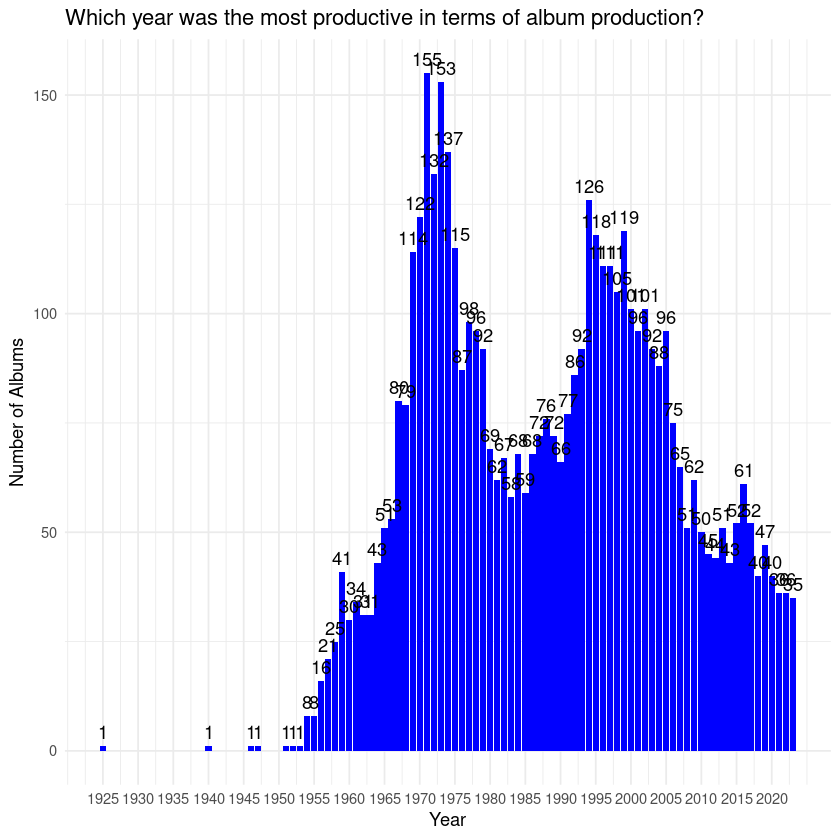

In [28]:
# Plot the data
p <- ggplot(yearly_counts, aes(x = year, y = count)) +
  geom_bar(stat = "identity", fill = "blue") +
  geom_text(aes(label = count), vjust = -0.5) +
  scale_x_continuous(breaks = seq(min(yearly_counts$year), max(yearly_counts$year), by = 5)) +
  labs(title = "Which year was the most productive in terms of album production?", x = "Year", y = "Number of Albums") +
  theme_minimal()
# Display the plot
print(p)

In [29]:
# Print the most productive year in terms of album sales
max_year <- yearly_counts[which.max(yearly_counts$count), ]
cat(paste("The most productive year in terms of album production was", max_year$year, "with", max_year$count, "albums sold."))

The most productive year in terms of album production was 1971 with 155 albums sold.

In [30]:
1971 seem to have the most ranked albums out of any year

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: 1971 seem
         ^


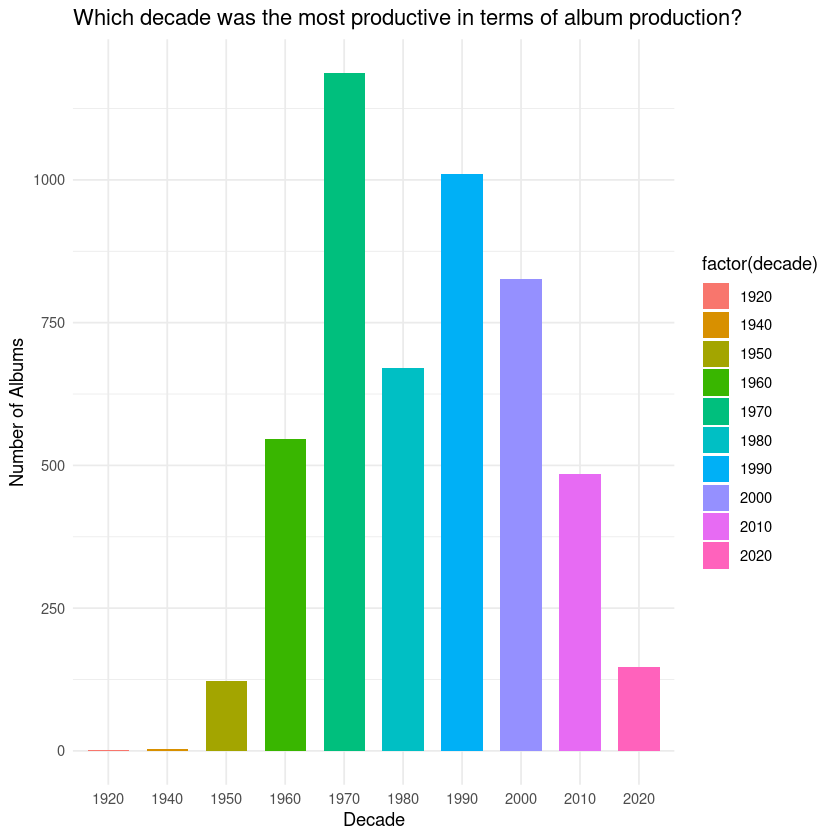

In [33]:
# Create a new variable for the decade
all_data$decade <- 10 * (all_data$year %/% 10)

# Plotting
ggplot(all_data, aes(x=factor(decade), fill=factor(decade))) + 
  geom_bar(width=0.7) +  
  labs(title="Which decade was the most productive in terms of album production?",
       x="Decade",
       y="Number of Albums") + 
  theme_minimal() +
  scale_x_discrete(breaks = unique(all_data$decade))

In [ ]:
The '70's are  the highest.

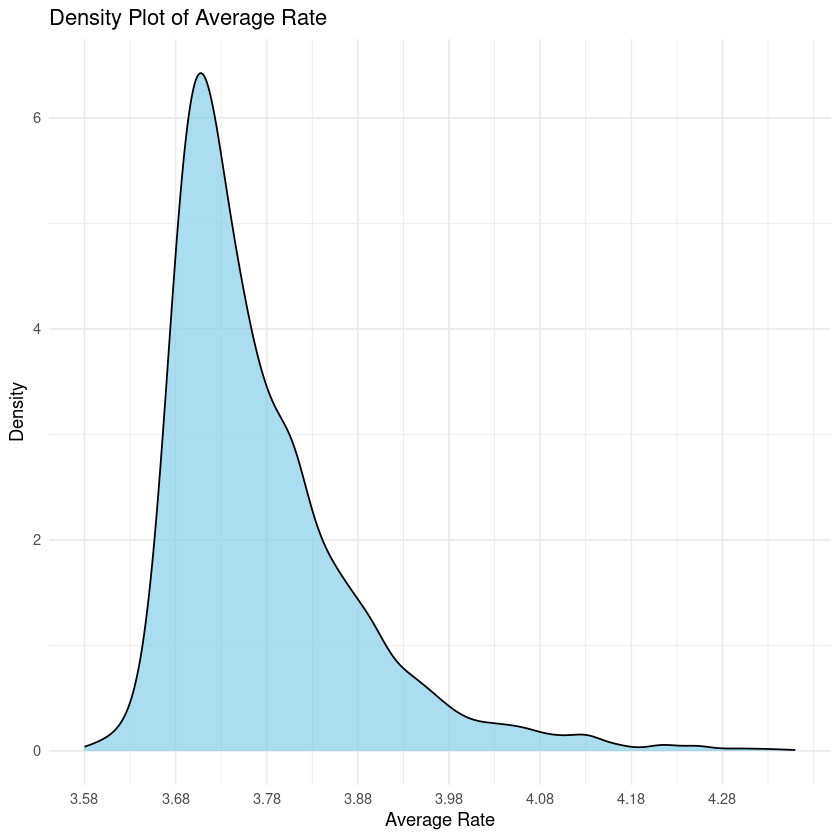

In [34]:
# Density plot of average rate with x-axis interval of 0.1
p_density <- ggplot(all_data, aes(x = Rating)) +
  geom_density(fill = "skyblue", alpha = 0.7) +
  labs(title = "Density Plot of Average Rate", x = "Average Rate", y = "Density") +
  scale_x_continuous(breaks = seq(min(all_data$Rating), max(all_data$Rating), by = 0.1)) +
  theme_minimal()

# Display the density plot
print(p_density)

In [ ]:
The distribution of mean ratings shows that the most frequent ratings are between 3.68 and 3.78.

In [35]:
# Ensure necessary library is installed
install.packages("forcats")
install.packages("tidyr")

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [36]:
# Load the library
library(forcats)
library(tidyr)

In [37]:
# Separate rows where genre contains commas or another delimiter
all_data_separated <- all_data %>%
  separate_rows(Genres, sep = ",") %>%   # Replace "," with your delimiter if different
  mutate(Genres = trimws(Genres))   # Remove any white space

# Now, re-calculate the genre count
genre_count <- all_data_separated %>%
  group_by(Genres) %>%
  summarise(Count = n()) %>%
  arrange(-Count)

# Select the top 10 genres with the most comments
top_10_genres <- head(genre_count, 10)$Genres

# Filter the data to include only these top 10 genres
filtered_data <- all_data_separated %>% 
  filter(Genres %in% top_10_genres)

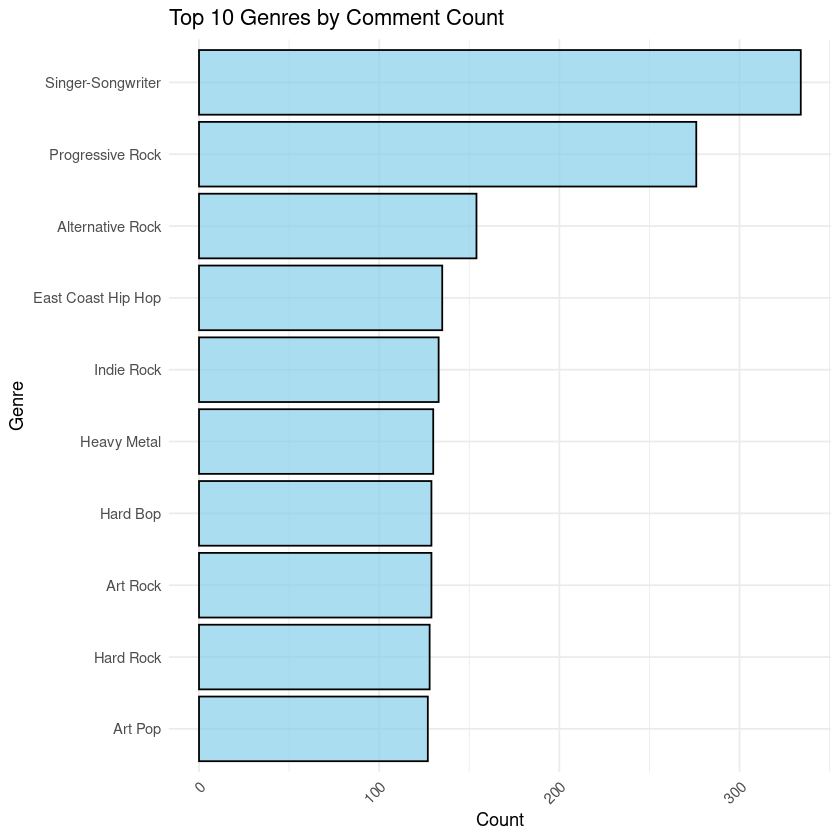

In [38]:
# Create a horizontal bar chart for the top 10 genres, ordered from highest to lowest
p_histogram <- ggplot(filtered_data, aes(y = fct_reorder(Genres, Genres, .fun = length))) +
  geom_bar(fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Top 10 Genres by Comment Count", x = "Count", y = "Genre") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Display the bar chart
print(p_histogram)

In [ ]:
Singer/Songwriter is most genres 

In [39]:
# Install package and load library
install.packages(c("tm", "wordcloud", "RColorBrewer"))
library(tm)
library(wordcloud)
library(RColorBrewer)

Installing packages into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: RColorBrewer



In [40]:
# Create a corpus from the 'descriptors' column
corpus <- Corpus(VectorSource(all_data$Descriptors))

# Clean the corpus: convert to lowercase, remove numbers, punctuation, whitespace, and common stopwords
corpus <- corpus %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removeWords, stopwords("english"))

# Create a matrix
descriptor_tm <- TermDocumentMatrix(corpus) 
descriptor_matrix <- as.matrix(descriptor_tm) 
descriptor_words <- sort(rowSums(descriptor_matrix),decreasing=TRUE) 
descriptor_df <- data.frame(word = names(descriptor_words), freq=descriptor_words)

Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”


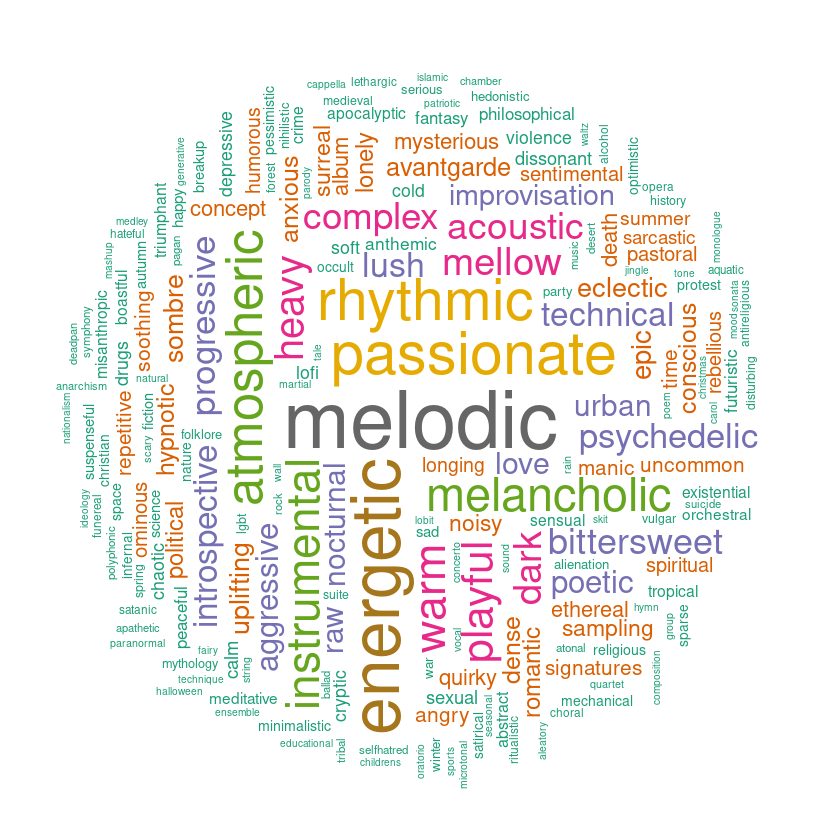

In [41]:
# Generate the Word Cloud
descriptor_word_cloud <- wordcloud(words = descriptor_df$word, 
                                   freq = descriptor_df$freq, 
                                   min.freq = 1,           
                                   max.words = 4000, 
                                   random.order = FALSE, 
                                   rot.per = 0.5,            
                                   colors = brewer.pal(8, "Dark2"))

In [ ]:
As this word cloud shows, the melodic is the most common descriptor among top 5000 albums' descriptors.

In [42]:
# Adding a new column called Ranking
all_data$Ranking <- 1:nrow(all_data)

In [43]:
# Set seed for reproducibility
set.seed(123)

# Take a random sample of 250 observations
sample_data <- all_data[sample(1:nrow(all_data), 250), ]

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


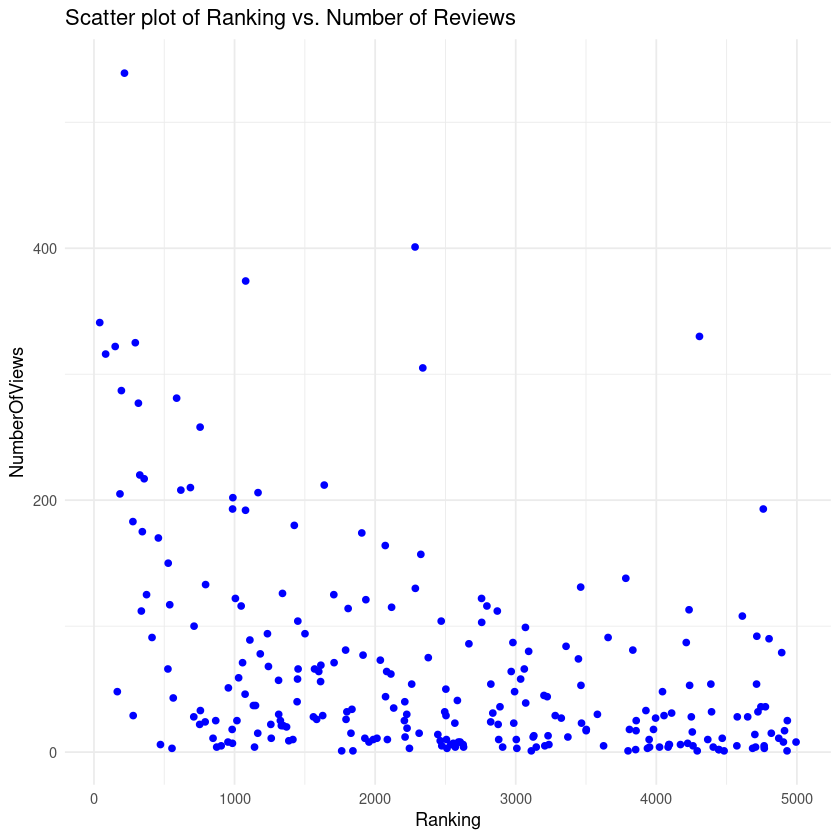

In [44]:
# Scatter plot for Ranking vs. Number of Reviews
library(ggplot2)
ggplot(sample_data, aes(x = Ranking, y = NumberOfViews)) + 
  geom_point(color="blue") + 
  ggtitle("Scatter plot of Ranking vs. Number of Reviews") +
  theme_minimal()

In [45]:
The average the ranking of an album goes down, so does the number of reviews for that album

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: The average
        ^


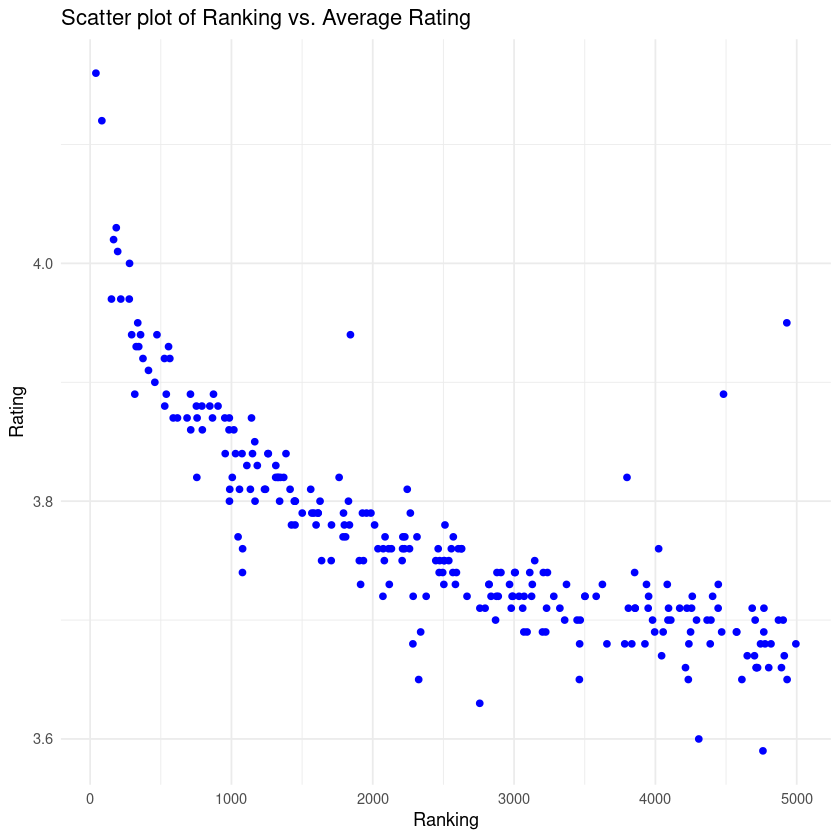

In [46]:
# Scatter plot for Ranking vs.Rating
ggplot(sample_data, aes(x = Ranking, y = Rating)) + 
  geom_point(color="blue") + 
  ggtitle("Scatter plot of Ranking vs. Average Rating") +
  theme_minimal()

In [ ]:
As the ranking of an album goes down so does the average rating